# Insurance premium prediction using Machine learning

## Step 1(Importing libraries)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2(Importing dataset)

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 3(Information about dataset)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### There is no missing value in the data.

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There is no null values in any of the column

In [5]:
df.duplicated().sum()
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


#### There is one duplicated cell with index 581

In [6]:
df.drop(index=581,inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

#### We have successfully removed the duplicated value.

In [8]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### This gives statistical summary of numerical data.

In [9]:
df.describe(include=object)

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


#### This gives statistical summary of categorical data.

In [10]:
df.shape

(1337, 7)

## Step 4(Data Preprocessing)

#### Outlier detection
1. Using Standard Deviation

In [11]:
features_n=["age","bmi","children","charges"]

In [12]:
outlier_index_list=[]
for f in features_n:
    mean=df[f].mean()
    sd=df[f].std()

    index=df[(df[f]<mean-3*sd)|(df[f]>mean+3*sd)].index
    outlier_index_list.extend(index)

In [13]:
outlier_index_list=sorted(set(outlier_index_list))
outlier_index_list=np.array(outlier_index_list)
outlier_index_list=outlier_index_list.T
outlier_index_list

array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317])

In [14]:
len(outlier_index_list)

29

#### We have found 29 outliers out of 1337 in our data using Standard deviation.

2. Using Interquartile range

In [15]:
outlier_index_list=[]
for f in features_n:
    q1=np.percentile(df[f],25)
    q3=np.percentile(df[f],75)
    iqr=q3-q1
    index=df[(df[f]<q1-1.5*iqr)|(df[f]>q3+1.5*iqr)].index
    outlier_index_list.extend(index)

In [16]:
outlier_index_list=sorted(set(outlier_index_list))
outlier_index_list

[14,
 19,
 23,
 29,
 30,
 34,
 38,
 39,
 49,
 53,
 55,
 82,
 84,
 86,
 94,
 109,
 116,
 123,
 146,
 158,
 161,
 175,
 185,
 203,
 223,
 240,
 242,
 251,
 252,
 254,
 256,
 263,
 265,
 271,
 281,
 286,
 288,
 292,
 298,
 312,
 314,
 322,
 327,
 328,
 330,
 338,
 373,
 377,
 381,
 401,
 420,
 421,
 422,
 441,
 476,
 488,
 500,
 524,
 530,
 543,
 549,
 558,
 569,
 577,
 587,
 609,
 615,
 621,
 623,
 629,
 665,
 667,
 668,
 674,
 677,
 682,
 689,
 697,
 706,
 725,
 736,
 738,
 739,
 742,
 759,
 803,
 819,
 826,
 828,
 842,
 845,
 847,
 850,
 852,
 856,
 860,
 883,
 893,
 901,
 917,
 947,
 951,
 953,
 956,
 958,
 1012,
 1021,
 1022,
 1031,
 1036,
 1037,
 1047,
 1049,
 1062,
 1070,
 1078,
 1088,
 1090,
 1096,
 1111,
 1117,
 1118,
 1122,
 1124,
 1139,
 1146,
 1152,
 1156,
 1186,
 1206,
 1207,
 1218,
 1230,
 1240,
 1241,
 1249,
 1284,
 1288,
 1291,
 1300,
 1301,
 1303,
 1313,
 1317,
 1323]

In [17]:
len(outlier_index_list)

145

#### There are 145 outliers out of 1337 using interquartile range.

3. Using Scatter and Boxplot

In [18]:
features_n

['age', 'bmi', 'children', 'charges']

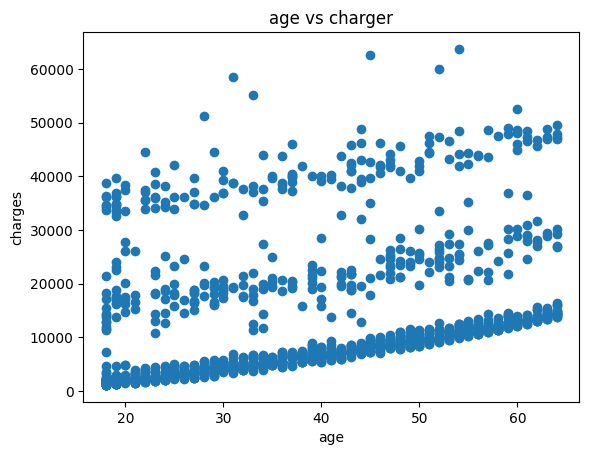

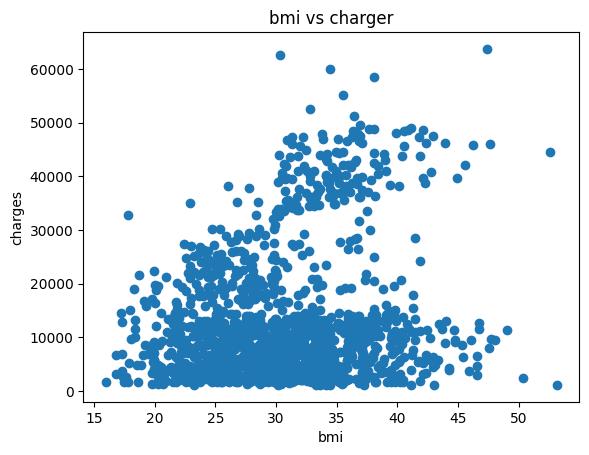

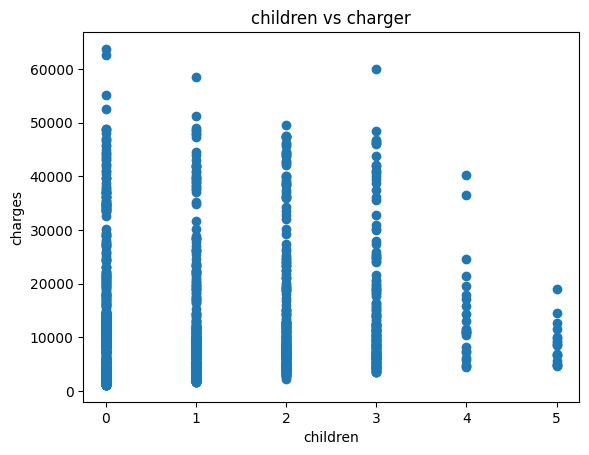

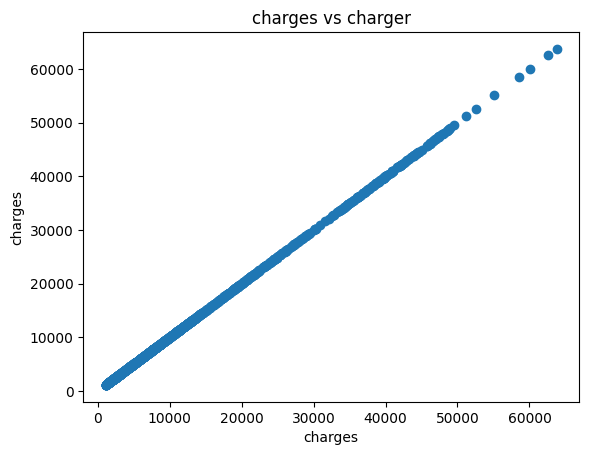

In [19]:
for f in features_n:
    plt.scatter(df[f],df["charges"])
    plt.title(f"{f} vs charger")
    plt.xlabel(f"{f}")
    plt.ylabel("charges")
    plt.show()

In [20]:
features_c=["sex","children","smoker","region"]

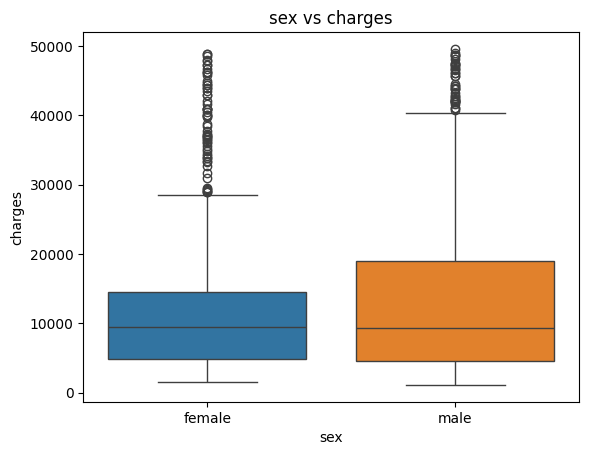

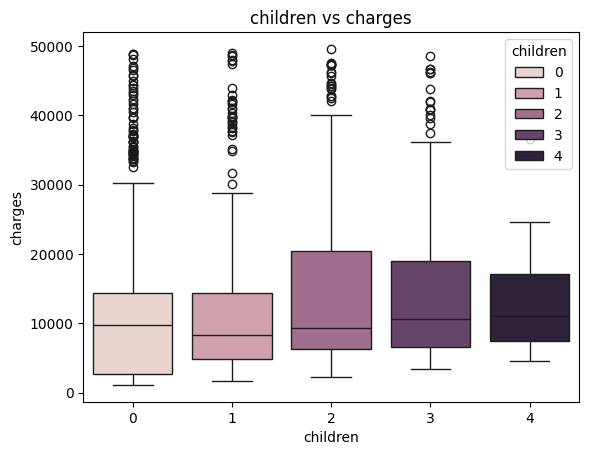

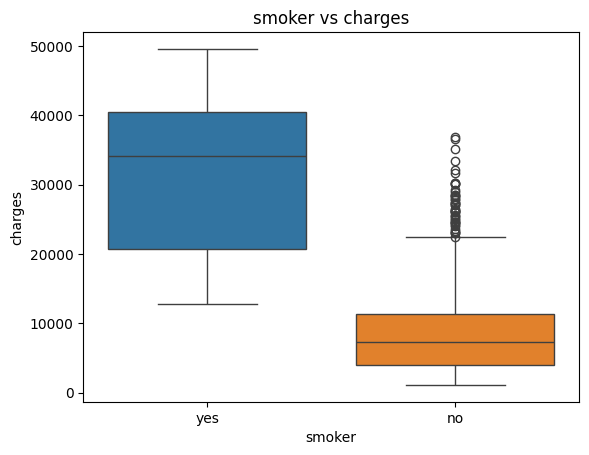

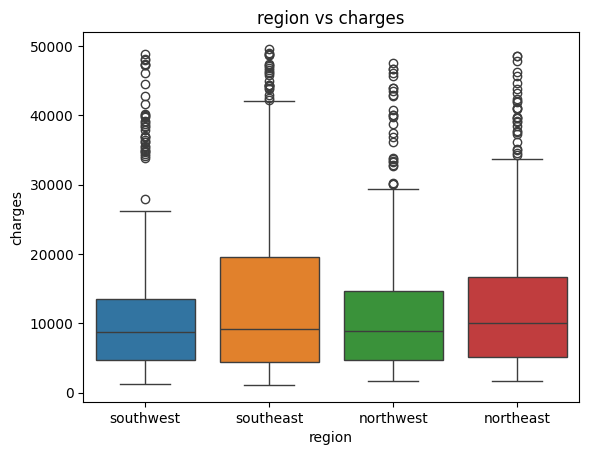

In [30]:
for f in features_c:
    sns.boxplot(x=df[f],y=df["charges"],data=df,hue=df[f])
    plt.title(f"{f} vs charges")
    plt.show()

#### There are plenty of outliers in our data but since data in large so we will remove the outliers by standard deviation method.

In [22]:
df.drop(index=[  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
               640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,1130, 1146,
               1230, 1245, 1272, 1300, 1317],inplace=True)

In [23]:
df.shape

(1308, 7)

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 5(Visualization)

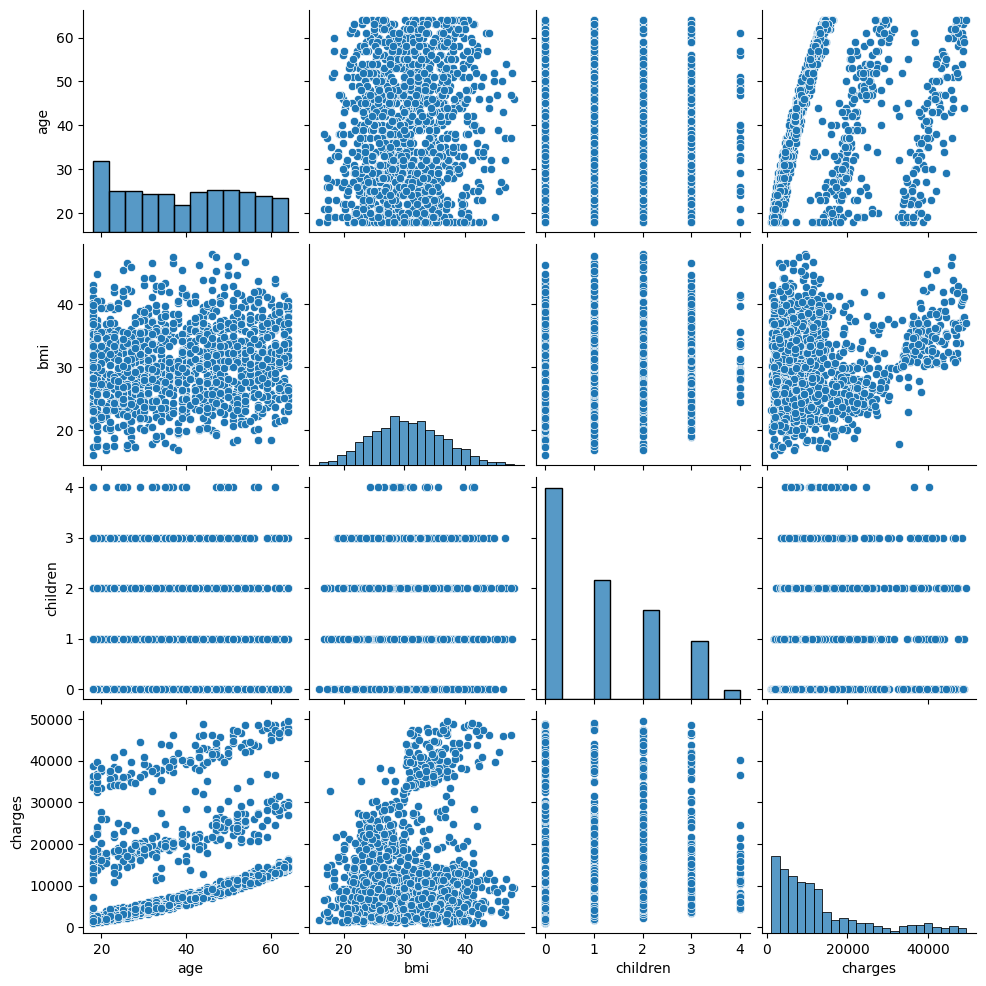

In [32]:
sns.pairplot(df)


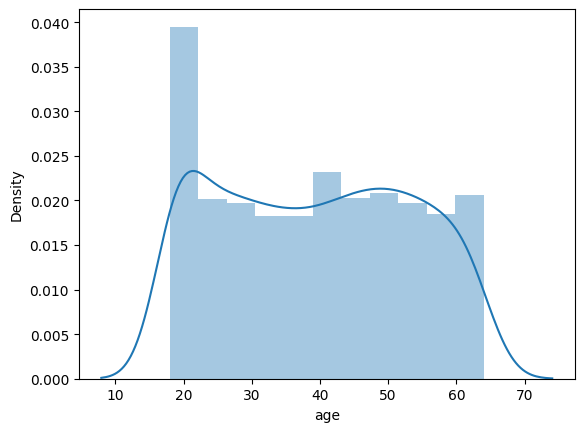

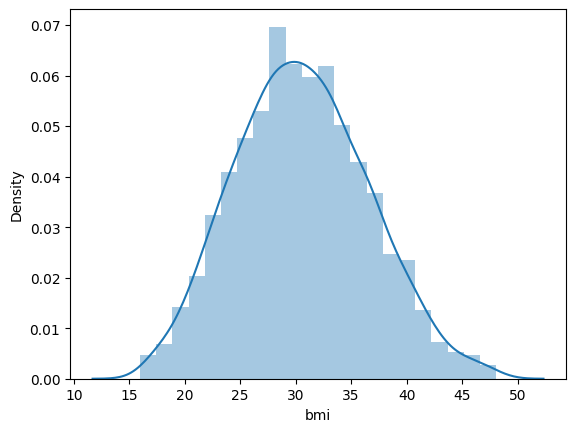

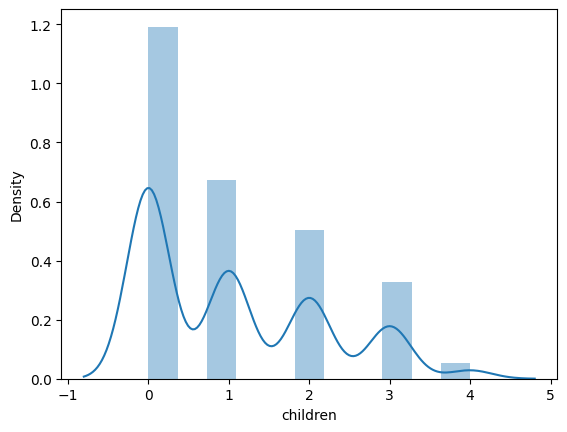

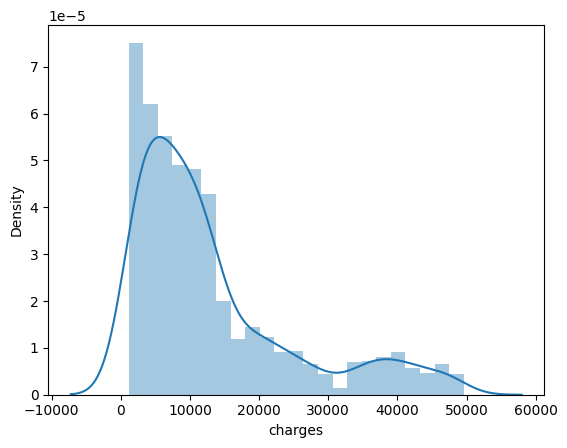

In [26]:
import warnings
warnings.filterwarnings("ignore")
for f in features_n:
    sns.distplot(df[f])
    plt.show()

#### The bmi column is right skewed and charges column is normally distriuted

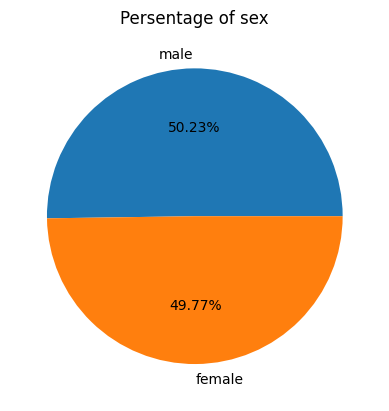

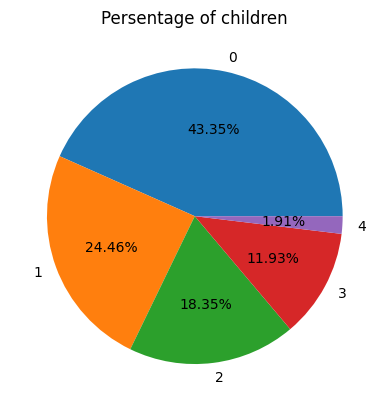

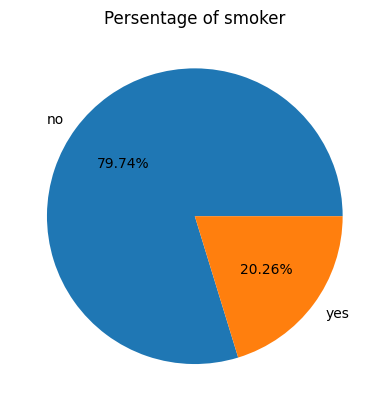

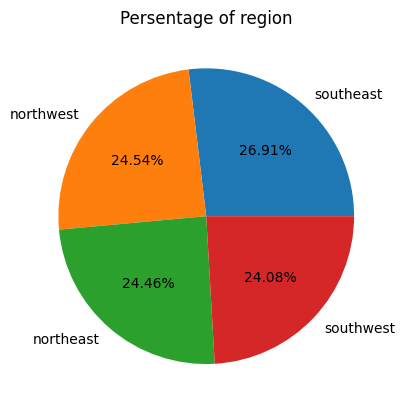

In [54]:
for f in features_c:
    s=df[f].value_counts()
    plt.pie(s,labels=s.index,autopct="%1.2f%%")
    plt.title(f"Persentage of {f}")
    plt.show()

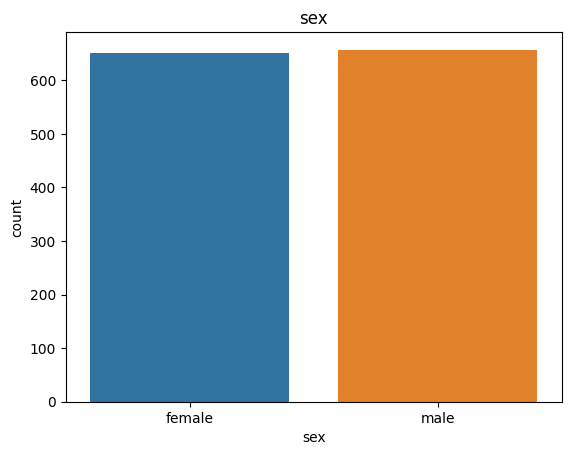

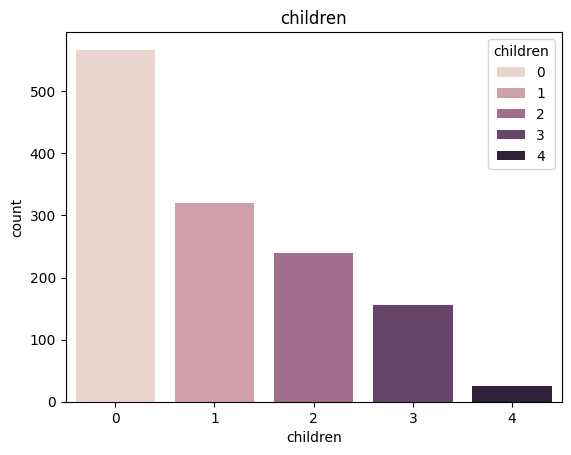

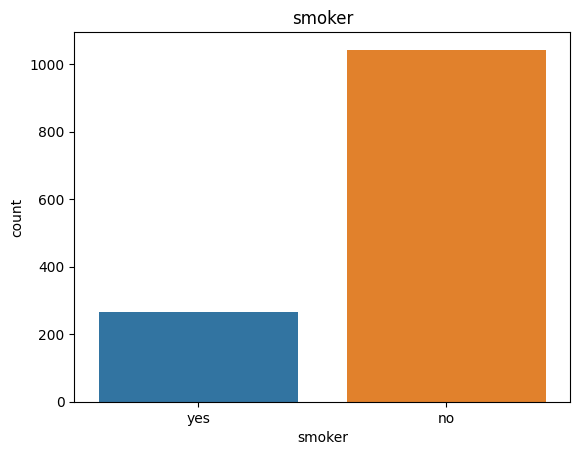

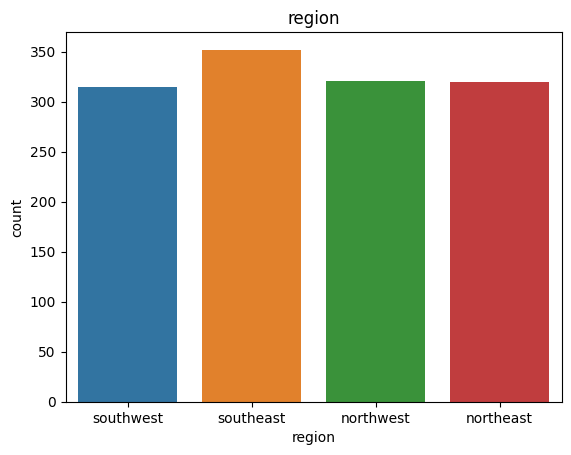

In [60]:
for f in features_c:
    sns.countplot(data=df,x=df[f],hue=df[f])
    plt.title(f"{f}")
    plt.show()

#### 1. No of males are slighly more han the no of females.
#### 2. Most people have no kids.
#### 3. Most people do not smake.
#### 4. Peoples are equally proportional from each of the region.

## Step 6(Categorical feature encoding)

In [64]:
categoricals=["sex","smoker","region"]
df1=pd.get_dummies(data=df,columns=categoricals,drop_first=True)

In [65]:
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
